For the experiments with GINCO, I'll use the text, marked with "keep".

In [1]:
import pandas as pd

In [4]:
file = pd.read_csv("C:/Users/tajak/Google Drive/GitHub/Genre-Datasets-Comparison/data-sheets-with-all-info/GINCO-MT-GINCO-keeptext-with-all-information.csv", sep="\t", index_col = 0)

file

,id,url,crawled,hard,primary_level_1,primary_level_2,primary_level_3,secondary_level_1,secondary_level_2,secondary_level_3,...,FTD_pred_on_SL,FTD_pred_on_MT,split-without-rare-categories,primary_level_4,downcast_split,CORE_main_pred_on_SL,CORE_main_pred_on_MT,CORE_sub_pred_on_SL,CORE_sub_pred_on_MT,primary_level_1_to_X-GENRE
0,3949,http://www.pomurje.si/aktualno/sport/zimska-li...,2014,False,News/Reporting,News/Reporting,News/Reporting,NaN,NaN,NaN,...,A8 (news),A8 (news),test,News/Reporting,test,Narrative,Narrative,Sports Report,Sports Report,News
1,3726,http://www.ss-sezana.si/sss/index.php?option=c...,2014,False,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN,NaN,...,A16 (information),A16 (information),test,Information/Explanation,dev,Informational Description/Explanation,Informational Description/Explanation,Description of a Thing,Description of a Thing,Information/Explanation
2,5621,http://www.kamnik-starejsi.si/novice/144-sodel...,2014,False,Promotion of Services,Promotion of Services,Promotion,Opinion/Argumentation,Opinion/Argumentation,Opinion/Argumentation,...,A12 (promotion),A12 (promotion),train,Promotion,test,Informational Description/Explanation,Informational Description/Explanation,Description of a Thing,Description of a Thing,Promotion
3,3776,http://www.radiocelje.si/novica.php?id=13007&a...,2014,False,News/Reporting,News/Reporting,News/Reporting,NaN,NaN,NaN,...,A8 (news),A8 (news),train,News/Reporting,train,Informational Description/Explanation,Informational Description/Explanation,News Report/Blog,News Report/Blog,News
4,2102,http://www.mtv.si/novice/selena-gomez-ponudila...,2014,False,Opinionated News,Opinionated News,Opinionated News,NaN,NaN,NaN,...,A8 (news),A8 (news),test,News/Reporting,train,Narrative,Narrative,News Report/Blog,News Report/Blog,News
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,374730,http://khetanes.si/sl-si/produkti/projektne-no...,2021,False,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN,NaN,...,A12 (promotion),A8 (news),test,Information/Explanation,test,Informational Description/Explanation,Informational Description/Explanation,Description of a Thing,Description of a Thing,Information/Explanation
998,476885,https://www.merkur.si/navigacija/nasveti/kopal...,2021,False,List of Summaries/Excerpts,List of Summaries/Excerpts,List of Summaries/Excerpts,NaN,NaN,NaN,...,A12 (promotion),A12 (promotion),train,List of Summaries/Excerpts,train,Informational Persuasion,Informational Persuasion,Description with Intent to Sell,Description with Intent to Sell,discarded
999,674213,http://www.sex2.si/category/ocene-izdelkov/,2021,False,List of Summaries/Excerpts,List of Summaries/Excerpts,List of Summaries/Excerpts,NaN,NaN,NaN,...,A12 (promotion),A12 (promotion),train,List of Summaries/Excerpts,train,Informational Persuasion,Informational Persuasion,Description with Intent to Sell,Description with Intent to Sell,discarded
1000,975590,http://www.ipsos.si/VodenjeVIZ_VI_past_dvojne_...,2021,False,Opinion/Argumentation,Opinion/Argumentation,Opinion/Argumentation,NaN,NaN,NaN,...,A1 (argumentative),A1 (argumentative),dev,Opinion/Argumentation,train,Informational Description/Explanation,Informational Description/Explanation,FAQ about Information,Question/Answer Forum,Opinion/Argumentation


In [5]:
file.columns

Index(['id', 'url', 'crawled', 'hard', 'primary_level_1', 'primary_level_2',
       'primary_level_3', 'secondary_level_1', 'secondary_level_2',
       'secondary_level_3', 'tertiary_level_1', 'tertiary_level_2',
       'tertiary_level_3', 'split', 'domain', 'GINCORE', 'Slovene_text',
       'MT_text', 'text_length', 'FTD_pred_on_SL', 'FTD_pred_on_MT',
       'split-without-rare-categories', 'primary_level_4', 'downcast_split',
       'CORE_main_pred_on_SL', 'CORE_main_pred_on_MT', 'CORE_sub_pred_on_SL',
       'CORE_sub_pred_on_MT', 'primary_level_1_to_X-GENRE'],
      dtype='object')

In [6]:
# Discard texts with "discarded" as X-GENRE label
file = file[file["primary_level_1_to_X-GENRE"] != "discarded"]

print(file.shape)

file['primary_level_1_to_X-GENRE'].value_counts()

(893, 29)


News                       221
Promotion                  209
Information/Explanation    139
Opinion/Argumentation      131
Other                       70
Forum                       52
Instruction                 44
Legal                       17
Prose/Lyrical               10
Name: primary_level_1_to_X-GENRE, dtype: int64

In [7]:
# Create a df for the simple transformers - with primary_level_1 as the labels and Slovene text as text
df = file[["Slovene_text","primary_level_1_to_X-GENRE"]]

df

,Slovene_text,primary_level_1_to_X-GENRE
0,"Šport <p/> Zimska liga malega nogometa sobota,...",News
1,JEDILNIK <p/> Iskalnik <p/> Poglavitni cilj pr...,Information/Explanation
2,Projekt INNOVAge in zavod Oreli <p/> Zavod Ore...,Promotion
3,"V novembru, mesecu preprečevanja odvisnosti, b...",News
4,Selena Gomez ponudila v poslušanje novi album ...,News
...,...,...
992,Kaj potrebuješ: plastično vrečko in zamrzovaln...,Instruction
993,"Igralni komplet vključuje: knjigo, ki opisuje ...",Promotion
995,EuroBasket in spremembe v prometnem režimu <p/...,News
997,Projektne novine <p/> Promocijski projektni ča...,Information/Explanation


In [8]:
df.columns = ["text", "labels"]

In [11]:
# Split the dataset (stratified split according to the label)
from sklearn.model_selection import train_test_split

train, devtest = train_test_split(df, test_size=0.4, random_state=42, shuffle = True, stratify = df.labels)

In [12]:
test, dev = train_test_split(devtest, test_size=0.5, random_state=42, shuffle = True, stratify = devtest.labels)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

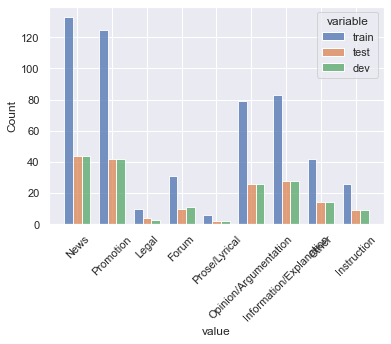

In [13]:
# Observe the distribution of the labels in all sets.
import matplotlib.pyplot as plt
import seaborn as sns

# make dataframe
merged_df = pd.DataFrame({"train":train.labels, "test":test.labels, "dev": dev.labels})

# plot melted dataframe in a single command
sns.set(rc = {'figure.figsize':(15,8)})

sns.histplot(merged_df.melt(), x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=20)

plt.xticks(rotation=45)

In [14]:
merged_df.describe()

,train,test,dev
count,535,179,179
unique,9,9,9
top,News,News,News
freq,133,44,44


In [15]:
print(train.labels.unique())

['Information/Explanation' 'Opinion/Argumentation' 'Promotion' 'Other'
 'Forum' 'News' 'Prose/Lyrical' 'Instruction' 'Legal']


In [16]:
# Save the new files as CSV
train.to_csv("C:/Users/tajak/Google Drive/GitHub/Genre-Datasets-Comparison/data-splits/GINCO-SL-X-GENRE-train.csv")
test.to_csv("C:/Users/tajak/Google Drive/GitHub/Genre-Datasets-Comparison/data-splits/GINCO-SL-X-GENRE-test.csv")
dev.to_csv("C:/Users/tajak/Google Drive/GitHub/Genre-Datasets-Comparison/data-splits/GINCO-SL-X-GENRE-dev.csv")

## Add information to the main sheet

In [18]:
# Add information about the splits to the main table
file.head(1)

,id,url,crawled,hard,primary_level_1,primary_level_2,primary_level_3,secondary_level_1,secondary_level_2,secondary_level_3,...,FTD_pred_on_SL,FTD_pred_on_MT,split-without-rare-categories,primary_level_4,downcast_split,CORE_main_pred_on_SL,CORE_main_pred_on_MT,CORE_sub_pred_on_SL,CORE_sub_pred_on_MT,primary_level_1_to_X-GENRE
0,3949,http://www.pomurje.si/aktualno/sport/zimska-li...,2014,False,News/Reporting,News/Reporting,News/Reporting,NaN,NaN,NaN,...,A8 (news),A8 (news),test,News/Reporting,test,Narrative,Narrative,Sports Report,Sports Report,News


In [19]:
# Add information about the splits
train["X-genre-split"] = "train"
test["X-genre-split"] = "test"
dev["X-genre-split"] = "dev"

In [20]:
# Merge the splits
merged_for_main_sheet = pd.concat([train["X-genre-split"], dev["X-genre-split"]])

merged_for_main_sheet

981    train
203    train
501    train
803    train
62     train
       ...  
181      dev
402      dev
553      dev
733      dev
354      dev
Name: X-genre-split, Length: 714, dtype: object

In [21]:
merged_for_main_sheet = pd.concat([merged_for_main_sheet, test["X-genre-split"]])

merged_for_main_sheet.head(3)

981    train
203    train
501    train
Name: X-genre-split, dtype: object

In [22]:
merged_for_main_sheet.describe()

count       893
unique        3
top       train
freq        535
Name: X-genre-split, dtype: object

In [23]:
# Add this information to the main table
final_file = file
final_file["X-genre-split"] = merged_for_main_sheet

final_file.head()

C:\Users\tajak\AppData\Local\Temp/ipykernel_3820/1230690757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_file["X-genre-split"] = merged_for_main_sheet


,id,url,crawled,hard,primary_level_1,primary_level_2,primary_level_3,secondary_level_1,secondary_level_2,secondary_level_3,...,FTD_pred_on_MT,split-without-rare-categories,primary_level_4,downcast_split,CORE_main_pred_on_SL,CORE_main_pred_on_MT,CORE_sub_pred_on_SL,CORE_sub_pred_on_MT,primary_level_1_to_X-GENRE,X-genre-split
0,3949,http://www.pomurje.si/aktualno/sport/zimska-li...,2014,False,News/Reporting,News/Reporting,News/Reporting,NaN,NaN,NaN,...,A8 (news),test,News/Reporting,test,Narrative,Narrative,Sports Report,Sports Report,News,train
1,3726,http://www.ss-sezana.si/sss/index.php?option=c...,2014,False,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN,NaN,...,A16 (information),test,Information/Explanation,dev,Informational Description/Explanation,Informational Description/Explanation,Description of a Thing,Description of a Thing,Information/Explanation,dev
2,5621,http://www.kamnik-starejsi.si/novice/144-sodel...,2014,False,Promotion of Services,Promotion of Services,Promotion,Opinion/Argumentation,Opinion/Argumentation,Opinion/Argumentation,...,A12 (promotion),train,Promotion,test,Informational Description/Explanation,Informational Description/Explanation,Description of a Thing,Description of a Thing,Promotion,test
3,3776,http://www.radiocelje.si/novica.php?id=13007&a...,2014,False,News/Reporting,News/Reporting,News/Reporting,NaN,NaN,NaN,...,A8 (news),train,News/Reporting,train,Informational Description/Explanation,Informational Description/Explanation,News Report/Blog,News Report/Blog,News,test
4,2102,http://www.mtv.si/novice/selena-gomez-ponudila...,2014,False,Opinionated News,Opinionated News,Opinionated News,NaN,NaN,NaN,...,A8 (news),test,News/Reporting,train,Narrative,Narrative,News Report/Blog,News Report/Blog,News,train


In [24]:
final_file["X-genre-split"].value_counts()

train    535
dev      179
test     179
Name: X-genre-split, dtype: int64

## Create test, train, dev files for MT-GINCO

I created the split files for MT-GINCO as well based on the split that was done for SL-GINCO.

In [25]:
final_file.head(2)

,id,url,crawled,hard,primary_level_1,primary_level_2,primary_level_3,secondary_level_1,secondary_level_2,secondary_level_3,...,FTD_pred_on_MT,split-without-rare-categories,primary_level_4,downcast_split,CORE_main_pred_on_SL,CORE_main_pred_on_MT,CORE_sub_pred_on_SL,CORE_sub_pred_on_MT,primary_level_1_to_X-GENRE,X-genre-split
0,3949,http://www.pomurje.si/aktualno/sport/zimska-li...,2014,False,News/Reporting,News/Reporting,News/Reporting,NaN,NaN,NaN,...,A8 (news),test,News/Reporting,test,Narrative,Narrative,Sports Report,Sports Report,News,train
1,3726,http://www.ss-sezana.si/sss/index.php?option=c...,2014,False,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN,NaN,...,A16 (information),test,Information/Explanation,dev,Informational Description/Explanation,Informational Description/Explanation,Description of a Thing,Description of a Thing,Information/Explanation,dev


In [26]:
final_file.columns

Index(['id', 'url', 'crawled', 'hard', 'primary_level_1', 'primary_level_2',
       'primary_level_3', 'secondary_level_1', 'secondary_level_2',
       'secondary_level_3', 'tertiary_level_1', 'tertiary_level_2',
       'tertiary_level_3', 'split', 'domain', 'GINCORE', 'Slovene_text',
       'MT_text', 'text_length', 'FTD_pred_on_SL', 'FTD_pred_on_MT',
       'split-without-rare-categories', 'primary_level_4', 'downcast_split',
       'CORE_main_pred_on_SL', 'CORE_main_pred_on_MT', 'CORE_sub_pred_on_SL',
       'CORE_sub_pred_on_MT', 'primary_level_1_to_X-GENRE', 'X-genre-split'],
      dtype='object')

In [27]:
# Create a df for the simple transformers - with primary_level_1 as the labels and MT text as text
mt_df = final_file[["MT_text",'primary_level_1_to_X-GENRE', 'X-genre-split']]

mt_df

,MT_text,primary_level_1_to_X-GENRE,X-genre-split
0,Sport <p/> Winter Little League Football Satur...,News,train
1,JEDILNIK <p/> Search <p/> The main objective o...,Information/Explanation,dev
2,Project INNOVAge and the Oreli Institute <p/> ...,Promotion,test
3,"In November, the month of addiction prevention...",News,test
4,Selena Gomez launches new album <p/> 16.07.201...,News,train
...,...,...,...
992,What you need: a plastic bag and a freezer. <p...,Instruction,test
993,The playset includes: a book describing what h...,Promotion,train
995,EuroBasket and changes in the traffic regime <...,News,train
997,Project News <p/> Promotional project newspape...,Information/Explanation,test


In [28]:
# Rename the columns
mt_df.columns = ["text", "labels", "split"]

In [29]:
mt_df.head(1)

,text,labels,split
0,Sport <p/> Winter Little League Football Satur...,News,train


In [30]:
# Save the split files as CSV
mt_df[mt_df["split"] == "train"].to_csv("C:/Users/tajak/Google Drive/GitHub/Genre-Datasets-Comparison/data-splits/MT-GINCO-X-GENRE-train.csv")
mt_df[mt_df["split"] == "test"].to_csv("C:/Users/tajak/Google Drive/GitHub/Genre-Datasets-Comparison/data-splits/MT-GINCO-X-GENRE-test.csv")
mt_df[mt_df["split"] == "dev"].to_csv("C:/Users/tajak/Google Drive/GitHub/Genre-Datasets-Comparison/data-splits/MT-GINCO-X-GENRE-dev.csv")